In [153]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import  DBSCAN
from scipy.cluster.hierarchy import dendrogram, linkage

In [137]:
# Load the Avila Bible dataset
df = pd.read_csv("Group_12_data_cleaned.csv")
X = df.drop(['monk'], axis=1).values

In [138]:
# Check descriptive statistics of dataset

df.describe()

,Unnamed: 0,intercolumnar distance,upper margin,lower margin,exploitation,row number,modular ratio,interlinear spacing,weight,peak number
count,20867.000000,20867.000000,20867.000000,20867.000000,20867.000000,20867.000000,20867.000000,20867.000000,20867.000000,20867.000000
mean,5216.250587,-0.038164,-0.057172,-0.009766,0.000115,0.204178,-0.004961,0.040236,-0.000634,0.002551
std,3011.965191,0.793469,0.480454,0.965513,0.999997,0.319982,0.968284,0.782209,0.995826,0.993220
min,0.000000,-3.498799,-2.426761,-3.210528,-5.440122,-1.078955,-4.128270,-4.876130,-4.247781,-4.238959
25%,2608.000000,-0.128929,-0.259834,0.064919,-0.527256,0.082961,-0.598658,-0.044076,-0.543914,-0.372457
50%,5216.000000,0.043885,-0.055704,0.214288,0.089437,0.261718,-0.058835,0.220177,0.108221,0.064084
75%,7824.500000,0.204355,0.203385,0.352988,0.643738,0.261718,0.564038,0.446679,0.648376,0.500624
max,10436.000000,4.969080,3.846334,5.491990,3.987152,1.066121,3.969075,3.995218,4.580832,3.244594


In [139]:
# Check data format

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20867 entries, 0 to 20866
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              20867 non-null  int64  
 1   intercolumnar distance  20867 non-null  float64
 2   upper margin            20867 non-null  float64
 3   lower margin            20867 non-null  float64
 4   exploitation            20867 non-null  float64
 5   row number              20867 non-null  float64
 6   modular ratio           20867 non-null  float64
 7   interlinear spacing     20867 non-null  float64
 8   weight                  20867 non-null  float64
 9   peak number             20867 non-null  float64
 10  monk                    20867 non-null  object 
dtypes: float64(9), int64(1), object(1)
memory usage: 1.8+ MB


In [140]:
# Drop the first index column

df = df.drop(columns=['Unnamed: 0'])

In [141]:
df['monk'].value_counts()

A    8572
F    3923
E    2190
I    1663
X    1044
H    1039
G     893
D     705
Y     533
C     206
W      89
B      10
Name: monk, dtype: int64

In [142]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20867 entries, 0 to 20866
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   intercolumnar distance  20867 non-null  float64
 1   upper margin            20867 non-null  float64
 2   lower margin            20867 non-null  float64
 3   exploitation            20867 non-null  float64
 4   row number              20867 non-null  float64
 5   modular ratio           20867 non-null  float64
 6   interlinear spacing     20867 non-null  float64
 7   weight                  20867 non-null  float64
 8   peak number             20867 non-null  float64
 9   monk                    20867 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [143]:
#replacing colummn 
df['monk'].replace(['A', 'F','E','I','X','H','G','D','Y','C','W','B'],
                       [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10, 11], inplace=True)

In [144]:
X = df.iloc[:,:-1]
y = df['monk']

In [145]:
# Preprocess the dataset
X_scaled = StandardScaler().fit_transform(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

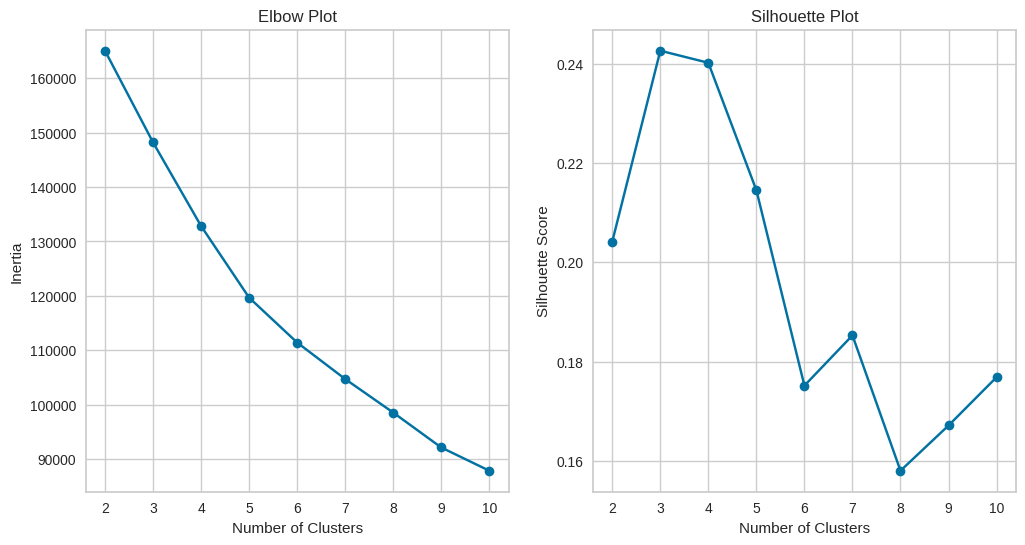

In [146]:
# Determine the optimal number of clusters using the elbow method
inertias = []
silhouettes = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)
    silhouettes.append(silhouette_score(X_scaled, kmeans.labels_))

# Plot the elbow and silhouette scores
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
ax[0].plot(range(2, 11), inertias, marker='o')
ax[0].set_xlabel('Number of Clusters')
ax[0].set_ylabel('Inertia')
ax[0].set_title('Elbow Plot')

ax[1].plot(range(2, 11), silhouettes, marker='o')
ax[1].set_xlabel('Number of Clusters')
ax[1].set_ylabel('Silhouette Score')
ax[1].set_title('Silhouette Plot')

plt.show()


In [148]:
from yellowbrick.cluster import KElbowVisualizer

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

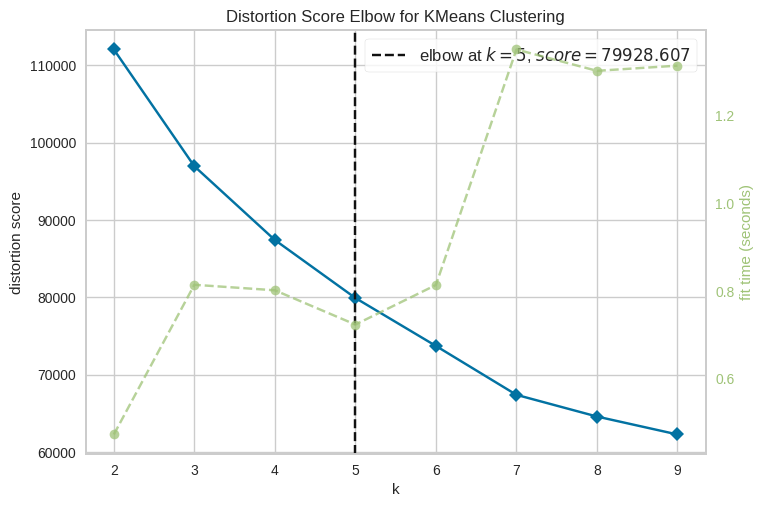

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [149]:
km = KMeans(random_state=42)
visualizer = KElbowVisualizer(km, k=(2,10))
 
visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

In [154]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(X_scaled)

# Calculate the silhouette score
score = silhouette_score(X_scaled, kmeans.labels_)
print("Silhouette score (kmeans): ", score)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette score (kmeans):  0.21453446671158516


k-distance plot to find the optimal eps value

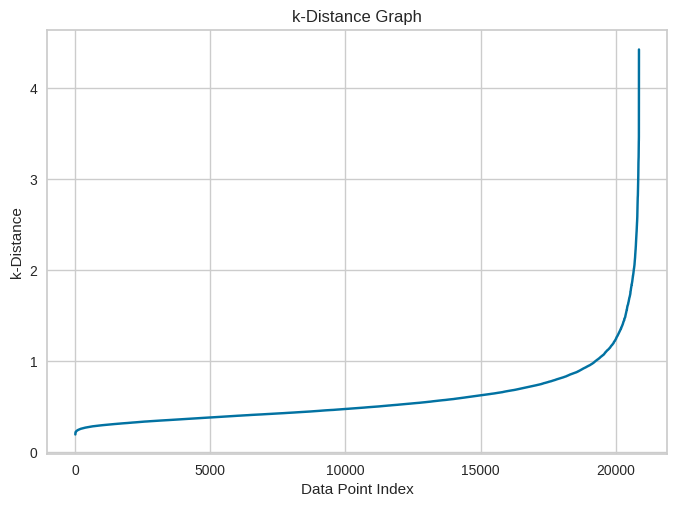

In [155]:
from sklearn.neighbors import NearestNeighbors
min_samples = 5
# Calculate the k-distance for each data point
nbrs = NearestNeighbors(n_neighbors=min_samples).fit(X)
distances, _ = nbrs.kneighbors(X)
k_distances = np.sort(distances[:, -1])

# Plot the k-distance graph
fig, ax = plt.subplots()
ax.plot(k_distances)
ax.set_title('k-Distance Graph')
ax.set_xlabel('Data Point Index')
ax.set_ylabel('k-Distance')
plt.show()

In [156]:
# Perform DBSCAN clustering
dbscan = DBSCAN(eps=3, min_samples=10)
y_dbscan = dbscan.fit_predict(X_scaled)

# Evaluate the clustering using silhouette score
silhouette_dbscan = silhouette_score(X_scaled,y_dbscan)
print("Silhouette Score (DBSCAN): ", silhouette_dbscan)

Silhouette Score (DBSCAN):  0.40017343158499774
